# Power of Thresholds Part 1

```{admonition} Learning Objectives
:class: tip
- Review basic image processing routine
- Understand threshold by visualization parameters `vmin` and `vmax`
```

## Review

The routine for starting image processing is basically the same. Here, we review the steps of import modules, define user inputs, read the image, visualize the image, and split color channels.

The cell image is from the [oxygen-glucose deprivation (OGD) severity study](https://www.doi.org/10.1002/btm2.10175) from the [Nance lab](https://www.nancelab.com/) (Andrea Joseph, Rick Liao, Mengying Zhang, Hawley Helmbrecht, Michael McKenna, Jeremy Filteau, Elizabeth Nance). The image is taken from the thalamus with DAPI/PI/Iba staining.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import

In [2]:
# relative path to the cell image
cell_im_path = '../data/ogd_cells.tif'

In [3]:
# read the image
cell_im = io.imread(cell_im_path)

In [4]:
def custom_plot_settings():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

    plt.rcParams.update({
        'font.family': 'Arial',  # Times New Roman, Calibri
        'font.weight': 'normal',
        'mathtext.fontset': 'cm',
        'font.size': 18,

        'lines.linewidth': 2,

        'axes.linewidth': 2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',

        'xtick.major.size': 8,
        'xtick.major.width': 2,
        'ytick.major.size': 8,
        'ytick.major.width': 2,

        'figure.dpi': 80,
        'savefig.dpi': 300,

        'legend.framealpha': 1,
        'legend.edgecolor': 'black',
        'legend.fancybox': False,
        'legend.fontsize': 14,
    })


custom_plot_settings()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

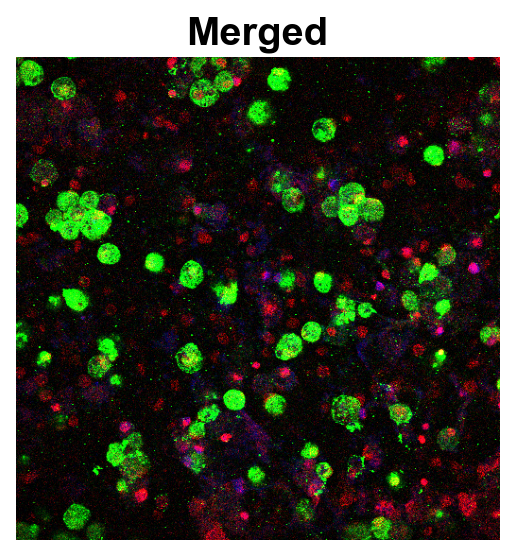

In [5]:
# visualize the image
plt.imshow(cell_im)
plt.title('Merged')
plt.axis('off')

In [6]:
# split color channel
red_cell_im = cell_im[:, :, 0]
green_cell_im = cell_im[:, :, 1]
blue_cell_im = cell_im[:, :, 2]

In [7]:
# define list for iterative components
im_list = [red_cell_im, green_cell_im, blue_cell_im, cell_im]
title_list = ['Red Channel - PI', 'Green Channel - Iba1',
              'Blue Channel - DAPI', 'Merged']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


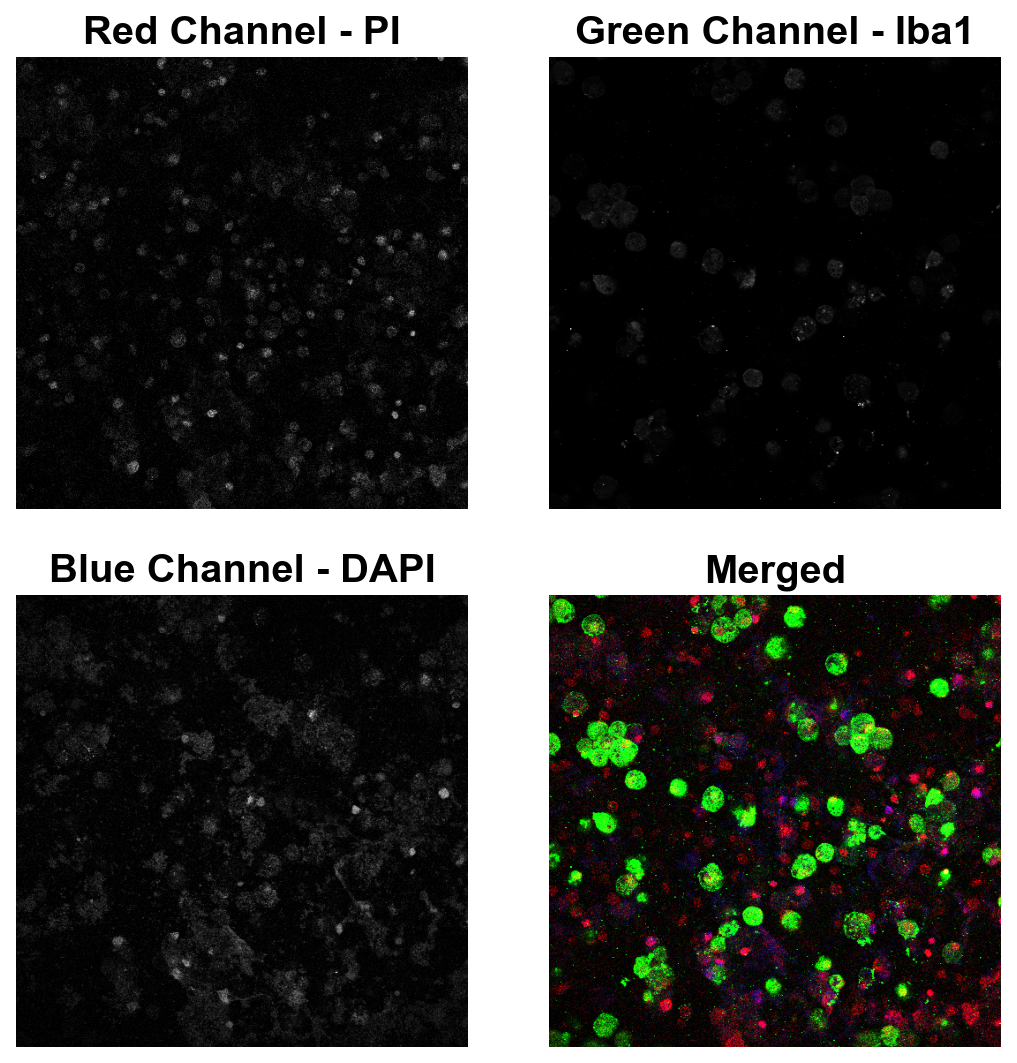

In [8]:
# visualize each channel and merged image
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(7, 7))
for row_i in range(row):
    for col_i in range(col):
        i = row_i * col + col_i  # counter
        axs[row_i, col_i].imshow(im_list[i], cmap='gray')  # display image
        axs[row_i, col_i].set_title(title_list[i])
        axs[row_i, col_i].axis('off')
plt.tight_layout()

## A basic "threshold"

The green channel shown above does not match well with the merged image. The merged image has a lot of green pixels, but the green channel image has barely anything. This is an example of a certain kind of "threshold". When `matplotlib` takes in a color image, the program scales the values to the range of 0 to 1 based on the maximum and minimum value in the image array. 

Such behavior is not desired in our case because most of the values in our image array is in the range of 0 ~ 255 instead of 0 ~ 4095, as shown in the histogram below.

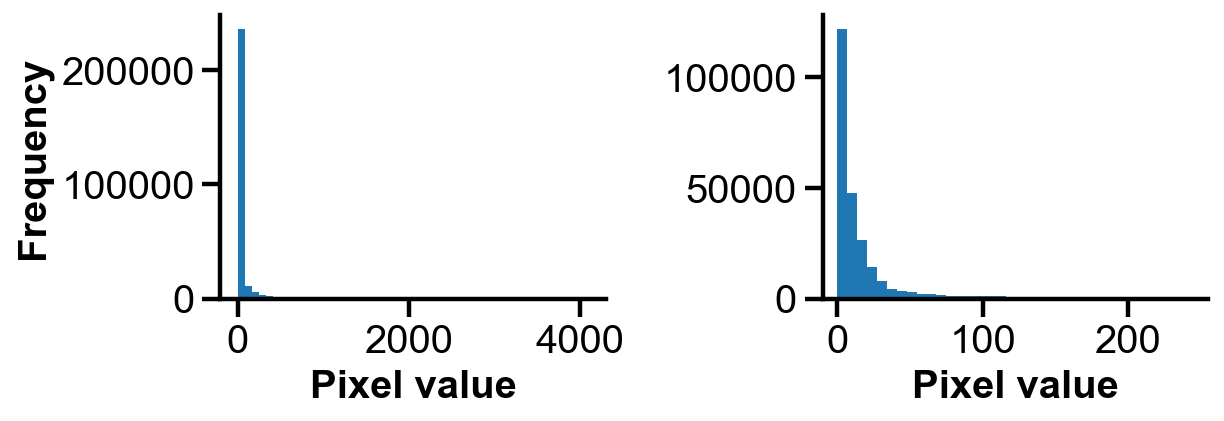

In [9]:
# get all values in the green channel
green_cell_im_values = green_cell_im.ravel()

# visualize frequency of each value
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].hist(green_cell_im_values, bins=50)
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(green_cell_im_values, bins=600)
axs[1].set_xlabel('Pixel value')
axs[1].set_xlim(-10, 255)
plt.tight_layout()

We can override this "threshold" by specifying the range of values in our image array using `vmin` and `vmax` (value minimum and maximum).

(-0.5, 511.5, 511.5, -0.5)

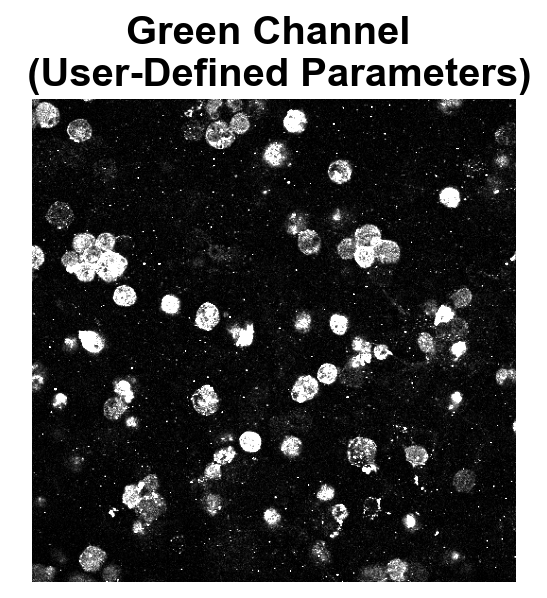

In [10]:
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)
plt.title('Green Channel \n (User-Defined Parameters)')
plt.axis('off')

## Visualization settings and the image array

The parameters only change the `matplotlib` visualization, but they do not change the actual value of the image. We can check this statement by noting the array `green_cell_im`, which should not change after `matplotlib` visualization.

In [11]:
# before visualization
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

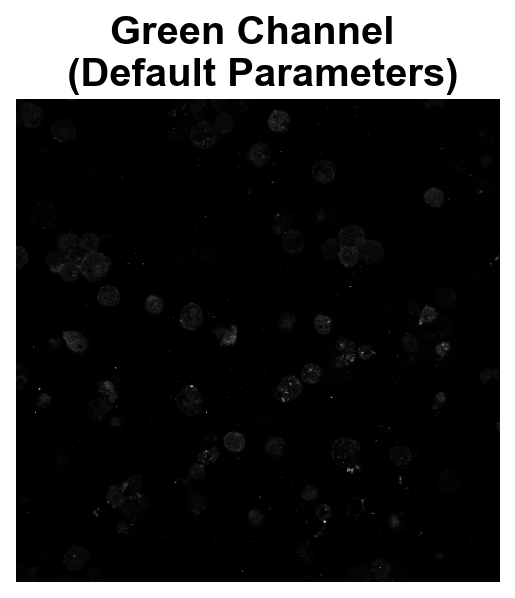

In [12]:
# default visualization
plt.imshow(green_cell_im, cmap='gray')
plt.title('Green Channel \n (Default Parameters)')
plt.axis('off')

In [13]:
# after default visualization, the values do not change
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

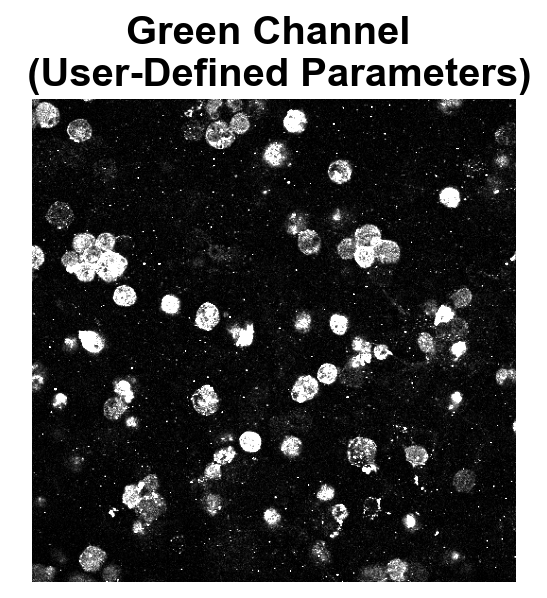

In [14]:
# manually ranged visualization
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)
plt.title('Green Channel \n (User-Defined Parameters)')
plt.axis('off')

In [15]:
# after manually ranged visualization, the values do not change
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

## Visualization exploration

Let's specify `vmin` and `vmax` for better visualization for all channels and images.

### All channels

In [16]:
# define list for iterative components
im_list = [red_cell_im, green_cell_im, blue_cell_im, cell_im]
title_list = ['Red Channel - PI', 'Green Channel - Iba1',
              'Blue Channel - DAPI', 'Merged']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


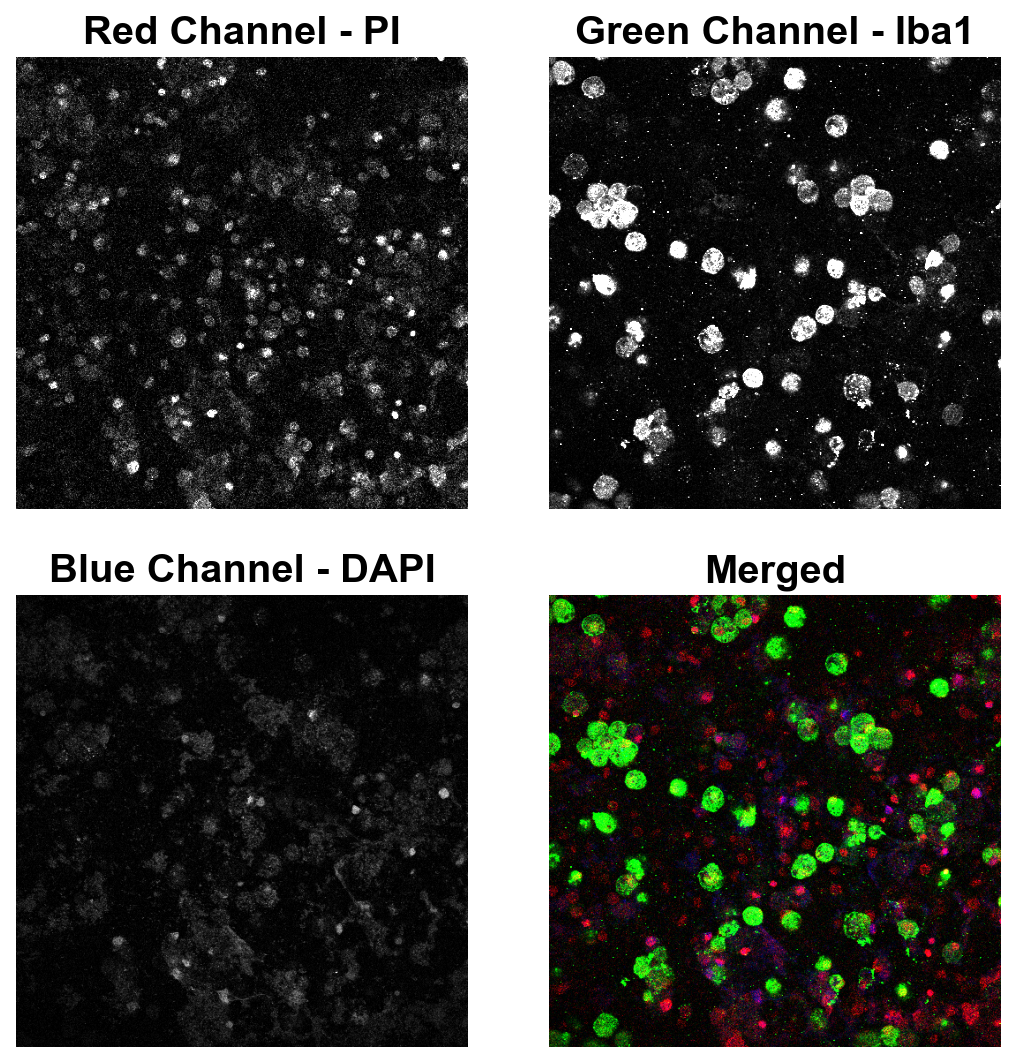

In [17]:
# visualize each channel and merged image
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(7, 7))
for row_i in range(row):
    for col_i in range(col):
        i = row_i * col + col_i  # counter
        axs[row_i, col_i].imshow(im_list[i], cmap='gray', vmin=0, vmax=255)  # display image
        axs[row_i, col_i].set_title(title_list[i])
        axs[row_i, col_i].axis('off')
plt.tight_layout()

The visualization is very different than the original, but the parameters match the merged image with individual channels better. Different values of the parameters can change the visualization by a lot. 

### Changing `vmax`

Next, we explore different `vmax` and the visualization produced by them.

In [18]:
# define list for iterative components
vmax_list = [10, 100, 200, 255]

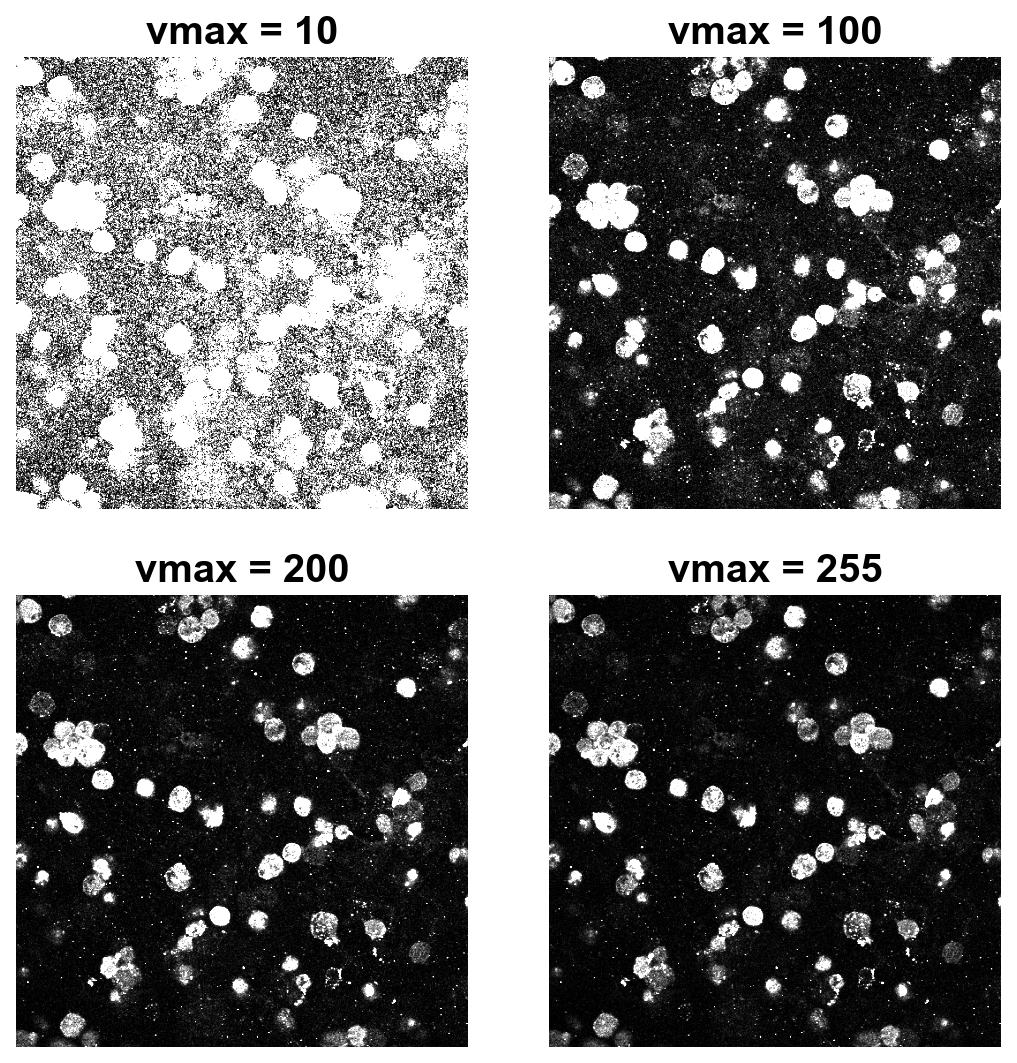

In [19]:
# visualize green channel with different vmax
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(7, 7))
for row_i in range(row):
    for col_i in range(col):
        i = row_i * col + col_i  # counter
        axs[row_i, col_i].imshow(green_cell_im, cmap='gray', vmin=0, vmax=vmax_list[i])  # display image
        axs[row_i, col_i].set_title(f'vmax = {vmax_list[i]}')
        axs[row_i, col_i].axis('off')
plt.tight_layout()

### Changing `vmin`

We now explore different `vmin` and the visualization produced by them.

In [20]:
# define list for iterative components
vmin_list = [10, 100, 200, 245]

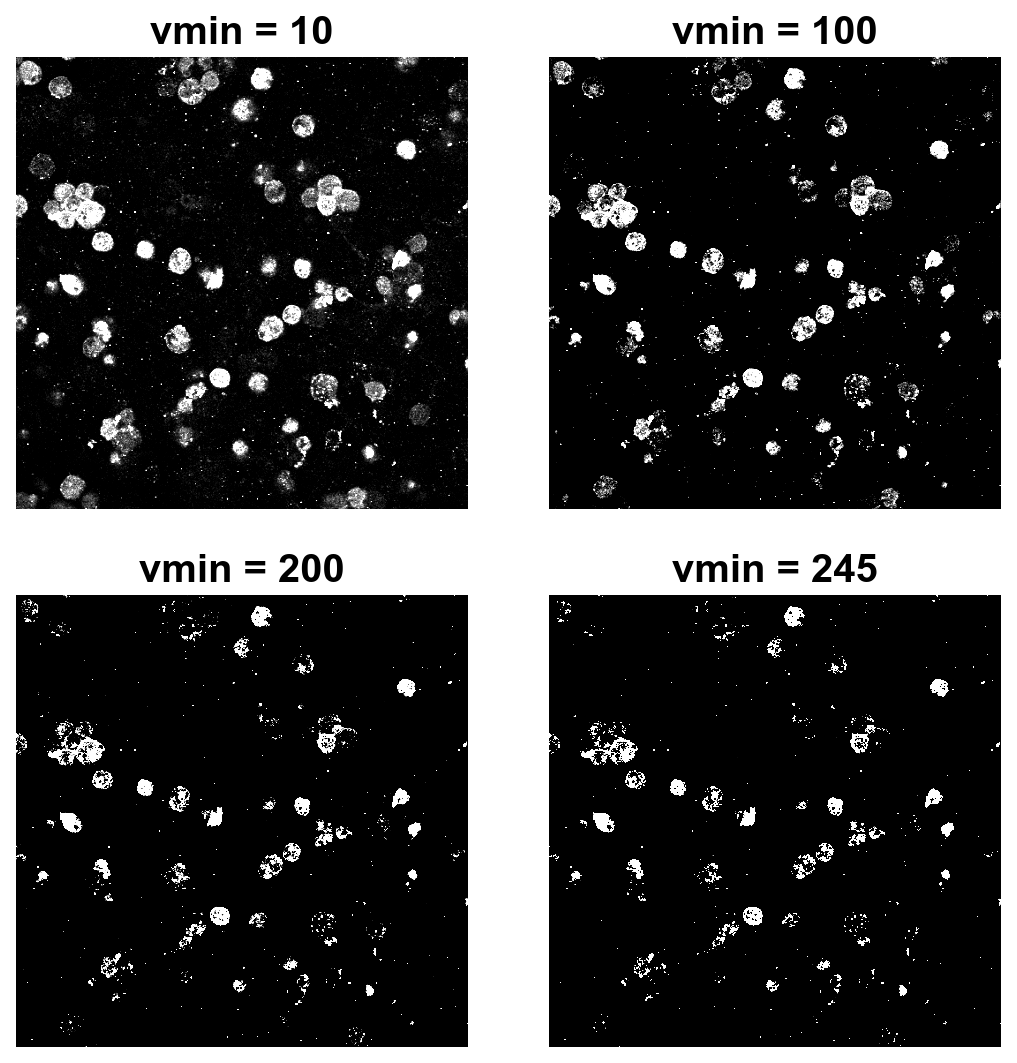

In [21]:
# visualize green channel with different vmax
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(7, 7))
for row_i in range(row):
    for col_i in range(col):
        i = row_i * col + col_i  # counter
        axs[row_i, col_i].imshow(green_cell_im, cmap='gray', vmin=vmin_list[i], vmax=255)  # display image
        axs[row_i, col_i].set_title(f'vmin = {vmin_list[i]}')
        axs[row_i, col_i].axis('off')
plt.tight_layout()

```{admonition} Activity
:class: note
How would the visualization settings affect scientific results and analysis?
```

## Conclusion

In this module, we reviewed the basic image processing routine and learned visualization settings as thresholds that can affect image interpretation.

```{admonition} Python Skills
:class: tip
- `matplotlib.pyplot.imshow()` - visualize image
    - `vmin` - minimum value
    - `vmax` - maximum value
```

In the next module, we will explore advanced thresholding methods that use mathematics to get optimal threshold.